In [ ]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
Kmeans Clustering
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("../../data/Mall_Customers.csv")

In [3]:
dataset.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
x=dataset.iloc[:, [3,4]].values

In [5]:
x[1:4]

array([[15, 81],
       [16,  6],
       [16, 77]], dtype=int64)

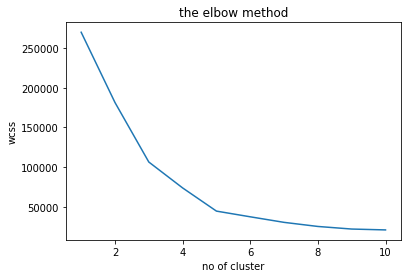

In [6]:
# using elbow method to find the optimal no of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('the elbow method')
plt.xlabel('no of cluster')
plt.ylabel('wcss')
plt.show()

In [9]:
#applying k-means with no of cluster = 5
kmeans=KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [11]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

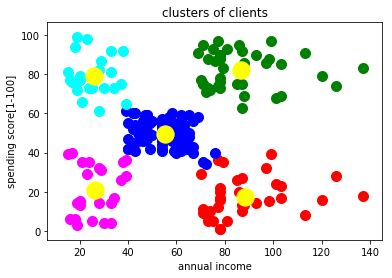

In [15]:
#visualising the clusters
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0,1], s=100, c='red', label='careful')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1,1], s=100, c='blue', label='standard')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2,1], s=100, c='green', label='target')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3,1], s=100, c='cyan', label='careless')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4,1], s=100, c='magenta', label='sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='centroids')
plt.xlabel('annual income')
plt.ylabel('spending score[1-100]')
plt.title('clusters of clients')
plt.show()